<a href="https://colab.research.google.com/github/MauroTalamantes/Filtros-Contraste-Transformacion-y-Morfologia/blob/main/Filtros%2C_Contraste%2C_Transformacion_y_Morfologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Importamos las imagenes desde el github
!git clone https://github.com/MauroTalamantes/Filtros-Contraste-Transformacion-y-Morfologia
%cd Filtros-Contraste-Transformacion-y-Morfologia

Cloning into 'Filtros-Contraste-Transformacion-y-Morfologia'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 4.25 MiB | 21.46 MiB/s, done.
/content/Filtros-Contraste-Transformacion-y-Morfologia/Filtros-Contraste-Transformacion-y-Morfologia


# 📙 Filtrado
El filtrado es una técnica para modificar o mejorar una imagen. En esencia, un filtro es una función matemática que se aplica a las imágenes. Puede utilizarse para enfatizar o eliminar ciertas características, como los bordes, suavizado, enfoque y detección de bordes. Por lo tanto, el filtrado es una técnica para:
  - Modificar o mejorar una imagen.
  - Enfatizar o eliminar ciertas características, como los bordes.
  - Suavizado, enfoque.
  - Detección de bordes.

El filtrado es una operación de vecindad. Donde **Vecindad** significa: Una operación de procesamiento de imágenes que implica procesar una imagen en secciones, llamadas bloques o vecindades, en lugar de procesar la imagen completa de una sola vez. El filtrado, la ecualización de histograma para mejorar el contraste y las funciones morfológicas utilizan este enfoque.

### 📌 Detección de Bordes
Con el filtrado, podemos detectar bordes. Esta técnica permite encontrar los límites de los objetos en las imágenes, así como segmentar y extraer información como cuántas monedas hay en una imagen. La mayor parte de la información de forma de una imagen se encuentra en los bordes.

La detección de bordes funciona detectando discontinuidades en el brillo, como en esta imagen, donde se observan las formas de los besos de chocolate.


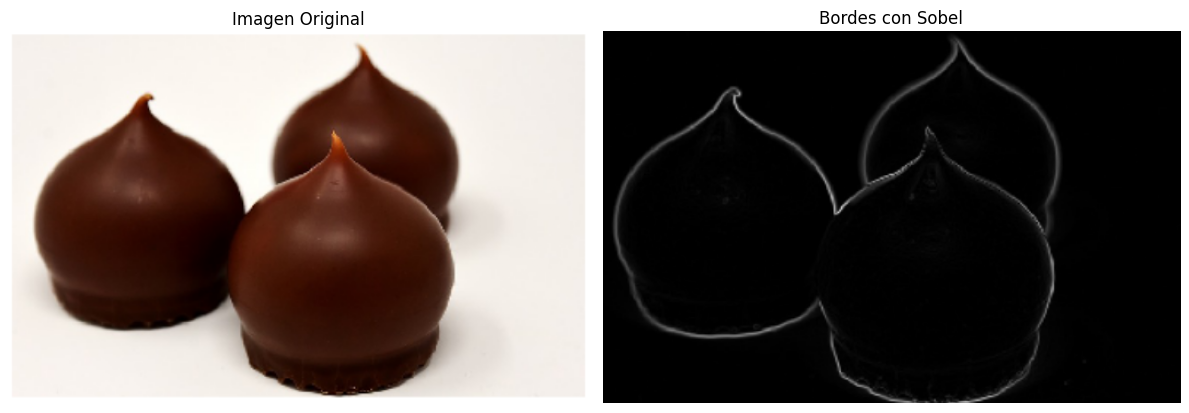

In [5]:
originalChocolate = plt.imread('dataset/originalChocolate.PNG')
edgeWithSobel = plt.imread('dataset/edgeWithSobel.PNG')

# Mostrar las 2 imagenes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mostrar la imagen original
axes[0].imshow(originalChocolate)
axes[0].set_title('Imagen Original')
axes[0].axis('off')  # Ocultar ejes

# Mostrar la imagen con detección de bordes Sobel
axes[1].imshow(edgeWithSobel)
axes[1].set_title('Bordes con Sobel')
axes[1].axis('off')  # Ocultar ejes

plt.tight_layout()
plt.show()

### 📌 Algoritmo de Detección de Bordes
#### Sobel
Un algoritmo común de detección de bordes es **Sobel**. Este filtro se encuentra en el módulo de filtros de imágenes de Scikit con la función sobel.

Aplicamos el filtro pasando como parámetro la imagen de la que queremos detectar los bordes. Esta función requiere una imagen bidimensional en escala de grises como entrada. Por lo tanto, si se trata de una imagen en color, primero debemos convertirla a escala de grises. Después, mostramos la imagen original y la resultante con una función que utiliza subgráficos de Matplotlib.


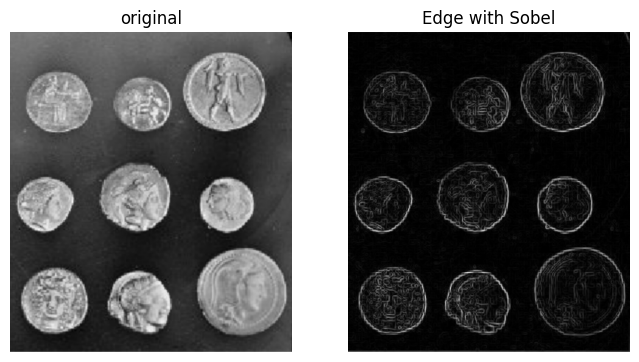

In [6]:
# Importamos el modulo y la funcion
from skimage.filters import sobel
from skimage import color

# Funcion para comparar imagenes
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)

    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')

    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

image_coins = plt.imread('dataset/original_coin.PNG')
#Convertimos a escala de grises
image_coins = color.rgba2rgb(image_coins)
image_coins = color.rgb2gray(image_coins)

# Aplicamos la deteccion de bordes
edge_sobel = sobel(image_coins)

# Mostramos el original y detección de bordes
plot_comparison(image_coins, edge_sobel, "Edge with Sobel")


### 📌 Suavizado
#### Suavizado gaussiano
Podemos lograr esto con un filtro gaussiano. Esta técnica se suele usar para desenfocar una imagen o reducir el ruido. Veamos cómo podemos lograrlo con una imagen de Scikit usando esta foto.

Importamos la función gaussiana del módulo de filtros de scikit-image. Para aplicar el filtro, la imagen original se pasa como primer parámetro a la función gaussiana y el parámetro booleano multicanal se establece en "True" si la imagen está en color; de lo contrario, debe establecerse en "False". Finalmente, comparemos la imagen original con la resultante.

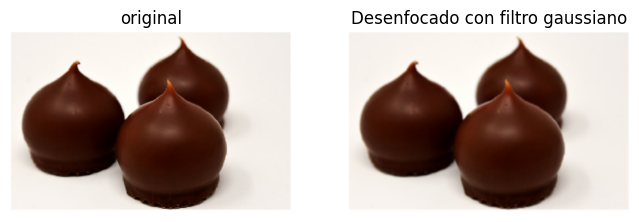

In [7]:
# Import the module and function
from skimage.filters import gaussian

chocolate_gauss = plt.imread('dataset/originalChocolate.PNG')

# Apply edge detection filter
gaussian_image = gaussian(chocolate_gauss, channel_axis=-1)

# Show original and resulting image to compare
plot_comparison(chocolate_gauss, gaussian_image, "Desenfocado con filtro gaussiano")


El filtro Gaussiano puede desenfocar la imagen y eliminar el ruido.

### 📝 Detección de bordes
En este ejercicio, detectaremos los bordes de una imagen aplicando el filtro Sobel.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

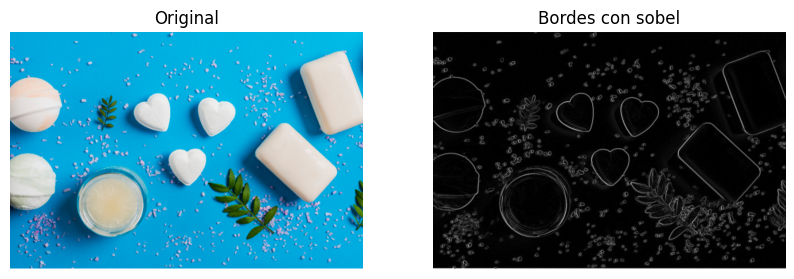

In [9]:
from skimage import color
from skimage.filters import sobel

soaps_image = plt.imread('dataset/soap_image.PNG')

# Convertimos a gris la imagen
soaps_image_gray = color.rgb2gray(color.rgba2rgb(soaps_image))

# Aplicamos la deteccion de bordes sobel
edge_sobel = sobel(soaps_image_gray)

# Mostramos la comparacion
plot_comparison(soaps_image, edge_sobel, "Bordes con sobel")

### 📝 Desenfocar para reducir el ruido
En este ejercicio reduciremos la nitidez de una imagen de un edificio tomada durante un viaje a Londres mediante un filtro.

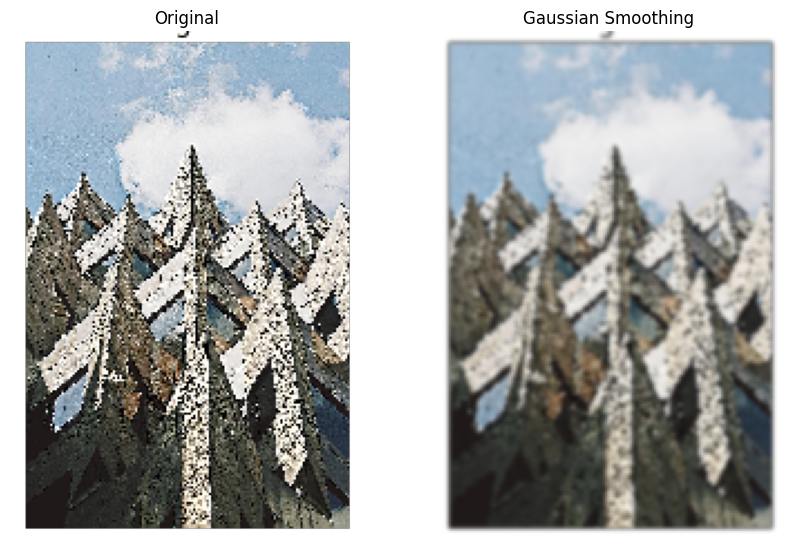

In [10]:
from skimage.filters import gaussian

# Read the image
building_image = plt.imread('dataset/building.png')

# Apply filter
gaussian_image = gaussian(building_image, channel_axis=-1)

# Show Comparison
plot_comparison(building_image, gaussian_image, "Gaussian Smoothing")

# 📙 Mejora del Contraste
La mejora de imagen puede ser extremadamente útil en diversas áreas. A menudo, imágenes médicas como esta radiografía pueden tener bajo contraste, lo que dificulta la detección de detalles importantes. Al mejorar el contraste, los detalles se vuelven más visibles. ¡Sin duda, es más fácil detectar detalles en esta imagen!

El **Contraste** de una imagen puede considerarse como la medida de su rango dinámico o la "extensión" de su histograma.

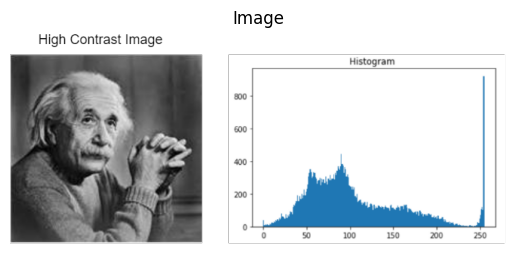

In [11]:
imageHistogram = plt.imread('dataset/imageHistogram.png')
show_image(imageHistogram)

El contraste es la diferencia entre la intensidad máxima y mínima de los píxeles de la imagen. El histograma de esta imagen se muestra a la derecha. El valor máximo de intensidad de píxeles es 255, mientras que el mínimo es 0.

255 - 0 = 255.

Una imagen con bajo contraste presenta una pequeña diferencia entre los valores de los píxeles oscuros y claros. Suele estar sesgada hacia la derecha (mayormente clara), hacia la izquierda (mayormente oscura) o en el centro (mayormente gris).

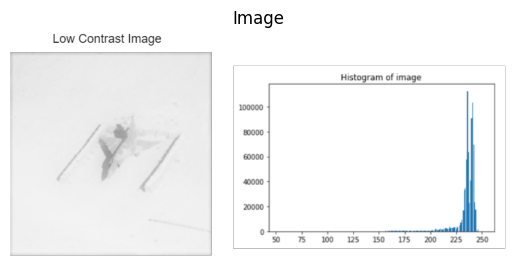

In [12]:
histogramImage = plt.imread('dataset/histogramImage.png')
show_image(histogramImage)

## Mejorar el contraste
- Estiramiento de contraste (Se utiliza para estirar el histograma de modo que se llene todo el rango de valores de intensidad de la imagen)
- Ecualización del histograma (distribuye los valores de intensidad del histograma más frecuentes mediante una distribución de probabilidad)
  - Ecualización del histograma
  - Ecualización adaptativa del histograma
  - Ecualización adaptativa del histograma limitada por contraste (CLAHE)

### 📌 Ecualización de histograma
Como hemos visto, la ecualización de histograma distribuye los valores de intensidad más frecuentes.

Para aplicar este tipo de ecualización de histograma, importe el módulo de exposición de scikit-image. De esta forma, tendremos acceso a todos los métodos de ecualización. En este caso, la función equalize_hist aplica la ecualización de histograma normal a la imagen original. A continuación, mostramos ambas imágenes, la original y la ecualizada, para ver la diferencia.

```python
from skimage import exposure

# Obtain the equalized image
image_eq = exposure.equalize_hist(image)

# Show original and result
show_image(image, 'Original')
show_image(image_eq, 'Histogram equalized')
```

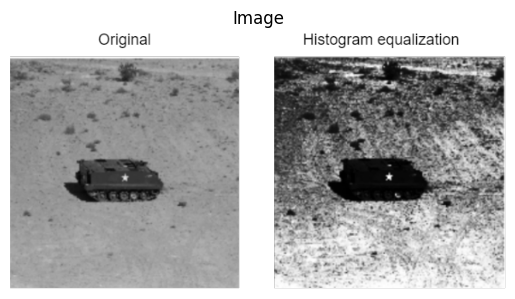

In [13]:
imagehi = plt.imread('dataset/hiequ.png')
show_image(imagehi)

Usando la ecualización de histograma, obtenemos un resultado que, a pesar del aumento de contraste, no parece natural. De hecho, ni siquiera parece que la imagen haya sido mejorada.

### 📌 Ecualización Adaptativa
La Ecualización Adaptativa calcula varios histogramas, cada uno correspondiente a una parte distinta de la imagen, y los utiliza para redistribuir los valores de luminosidad del histograma.

Un tipo de este método es la Ecualización de Histograma Adaptativa Limitada por Contraste (CLAHE), desarrollada para evitar la sobreamplificación del ruido que puede generar la ecualización de histograma adaptativa. En esta imagen, vemos el resultado del método CLAHE, que puede parecer muy similar al método estándar.

**El método adaptativo no es tan intenso, por lo que se ve más natural.** Esto se debe a que no toma el histograma global de toda la imagen, sino que opera en pequeñas regiones llamadas mosaicos o vecindades.

```python
from skimage import exposure

# Aplicar equalización adaptativa
image_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)

# Mostrar original y resultado
show_image(image, 'Original')
show_image(image_adapteq, 'CLAHE')
```

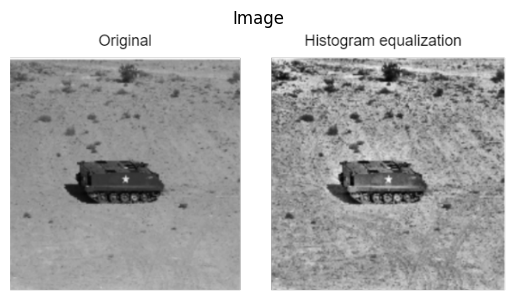

In [14]:
adaptive = plt.imread('dataset/adaptive.png')
show_image(adaptive)

### 📝 Imágenes médicas
Intentamos mejorar las herramientas de un hospital mediante el preprocesamiento de las radiografías para que los médicos tengan mayor probabilidad de detectar detalles relevantes. Probarás nuestro código con una radiografía de tórax del conjunto de datos de radiografías de tórax de los Institutos Nacionales de Salud.

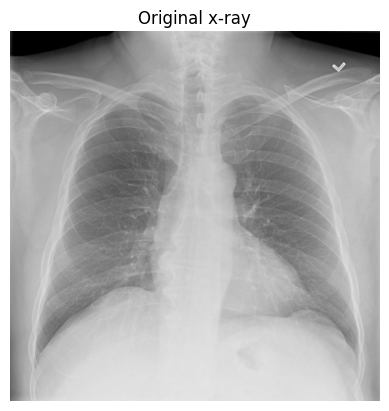

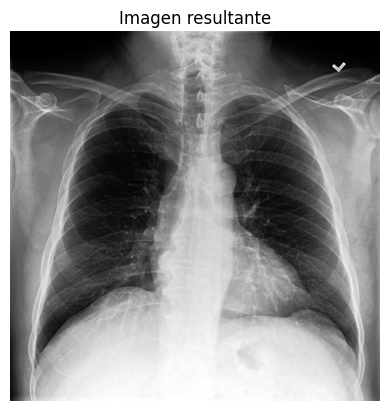

In [15]:
from skimage import exposure

chest_xray_image = plt.imread('dataset/chest_xray_image.png')

# Mostrar la original y su histograma
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histograma')
plt.hist(chest_xray_image.ravel(), bins=256);

xray_image_eq = exposure.equalize_hist(chest_xray_image)

# Mostrar el resultado de la imagen
show_image(xray_image_eq, 'Imagen resultante')

### 📝 Imagen aérea
En este ejercicio, mejoraremos la calidad de una imagen aérea de una ciudad. La imagen tiene poco contraste, por lo que no podemos distinguir todos los elementos.

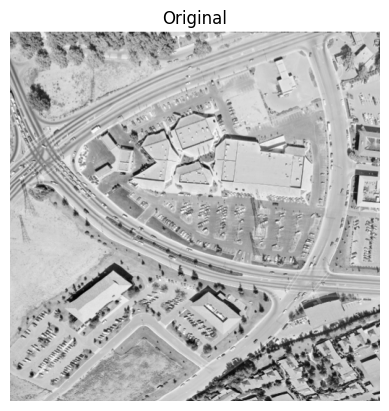

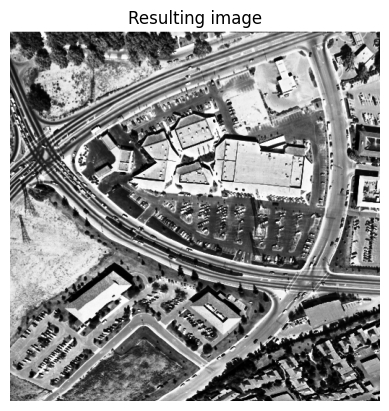

In [16]:
image_aerial = plt.imread('dataset/arial_image.png')

# Mostrar el original
show_image(image_aerial, 'Original')

# Utilice la ecualización de histograma para mejorar el contraste
image_eq = exposure.equalize_hist(image_aerial)

show_image(image_eq, 'Resulting image')

### 📝Añadimos impacto y contraste
¿A veces quieres mejorar el contraste de tus fotos para que se vean más impactantes?

En este ejercicio, aumentarás el contraste de una taza de café. Aunque no sea nuestra taza de café del domingo por la mañana, puedes aplicar los mismos métodos a cualquiera de nuestras fotos.

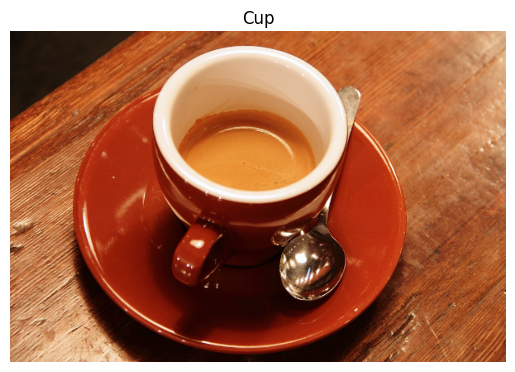

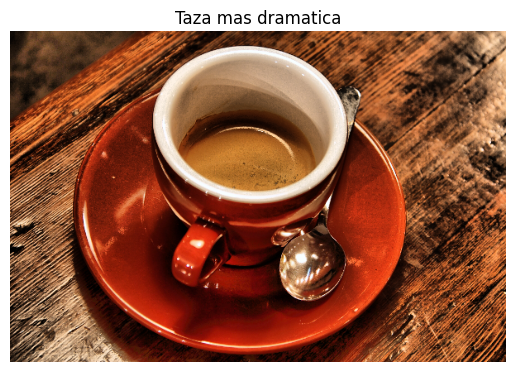

In [17]:
from skimage import data

# Cargamos la imagen
original_image = data.coffee()

# Mostramos la imagen
show_image(original_image, "Cup")

# Aplicamos la equalizacion adaptiva
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

show_image(adapthist_eq_image, 'Taza mas dramatica')

# 📙 Transformaciones
A veces necesitamos transformar imágenes rotándolas o redimensionándolas. Pero ¿por qué necesitamos transformar una imagen?

- Preparación de imágenes para la clasificación de modelos de aprendizaje automático
- Optimización y compresión de imágenes
- Guardar imágenes con la misma proporción

### 📌 Rotación
Podemos usar la función de rotación del módulo "transform" de scikit-image para rotar una imagen un ángulo determinado alrededor de su centro una vez que importamos el módulo y la función. En este código, obtenemos la imagen rotada 90 grados en el sentido de las agujas del reloj. El primer parámetro es la imagen que queremos rotar y el segundo es el ángulo. El ángulo de rotación se expresa en grados en sentido antihorario o antihorario. Por lo tanto, usamos valores negativos.

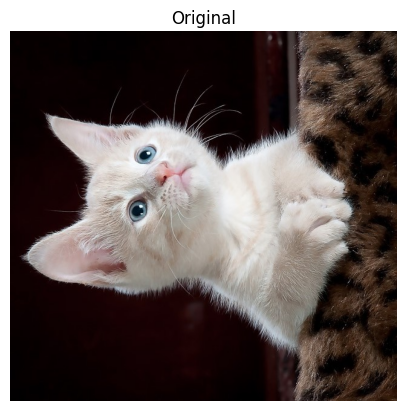

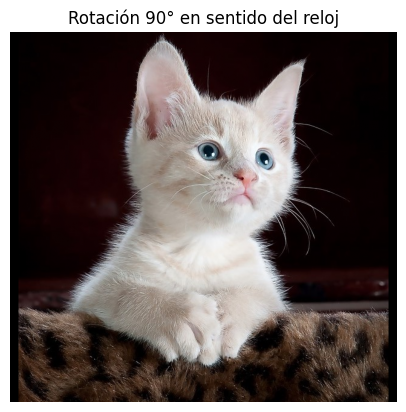

In [18]:
from skimage.transform import rotate

image_cat = plt.imread('dataset/image_cat.jpg')

# Rotacion

# Rotate the image 90 degrees clockwise
image_rotated = rotate(image_cat, -90)
show_image(image_cat, 'Original')

# Show the rotated image
show_image(image_rotated, 'Rotación 90° en sentido del reloj')

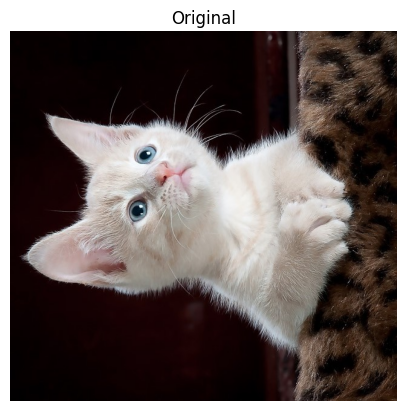

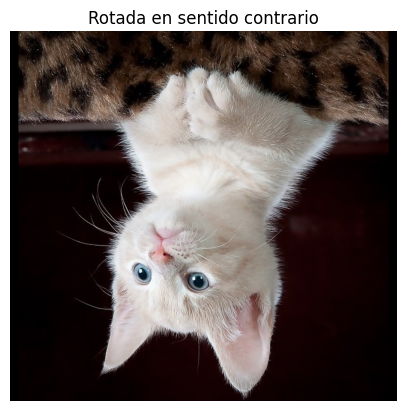

In [19]:
from skimage.transform import rotate

# Rotacion en sentido antihorario
image_rotated = rotate(image_cat, 90)
show_image(image_cat, 'Original')

# Mostrar la imagen rotada
show_image(image_rotated, 'Rotada en sentido contrario')

### 📌 Reescalado
Podemos usar la función de reescalado del módulo de transformación. Una vez importada, en este ejemplo reducimos la imagen cuatro veces su tamaño original estableciendo el factor de escala en 1/4. Al establecer el parámetro booleano anti_aliasing en verdadero, se especifica si se aplica un filtro para suavizar la imagen antes de reducirla.

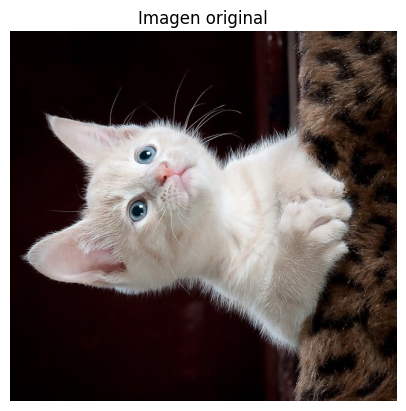

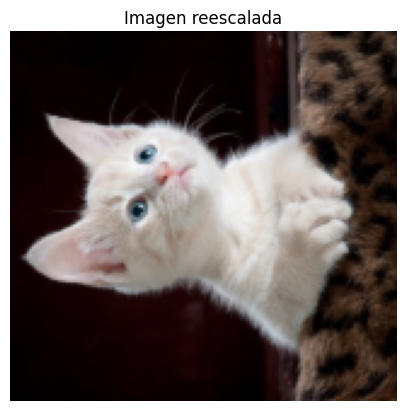

Tamaño original: (612, 640, 3)
Tamaño reescalado: (153, 160, 3)


In [20]:
from skimage.transform import rescale

# Rescale the image to be 4 times smaller
image_rescaled = rescale(image_cat, 1/4, anti_aliasing=True, channel_axis=-1)

show_image(image_cat, 'Imagen original')
show_image(image_rescaled,'Imagen reescalada')
print("Tamaño original:", image_cat.shape)
print("Tamaño reescalado:", image_rescaled.shape)

#### Aliasing en imágenes digitales
En una imagen digital, el aliasing es un patrón o efecto de ondulación. El aliasing hace que la imagen parezca tener ondas que irradian desde una parte específica. Esto ocurre porque la pixelación de la imagen es deficiente; simplemente no se ven bien.

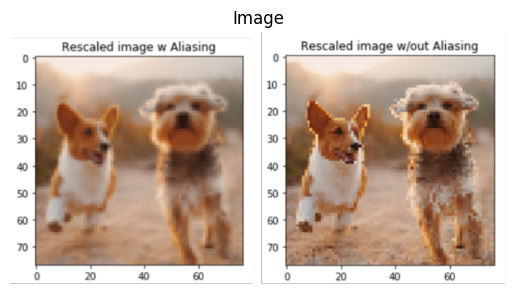

In [21]:
aliasing = plt.imread('dataset/aliasing.png')
show_image(aliasing)

Aquí, aplicamos un redimensionamiento de 1/30 y vemos el efecto del filtro antialiasing en la imagen cuando está activado. La primera imagen tiene el antialiasing en "Verdadero", por lo que se ve más suave. Mientras que la otra imagen, sin él, se ve pixelada.

### 📌 Redimensionar
El redimensionamiento se utiliza para que las imágenes tengan un tamaño determinado. Tiene el mismo propósito que el reescalado, pero permite especificar la forma de la imagen de salida en lugar de un factor de escala.

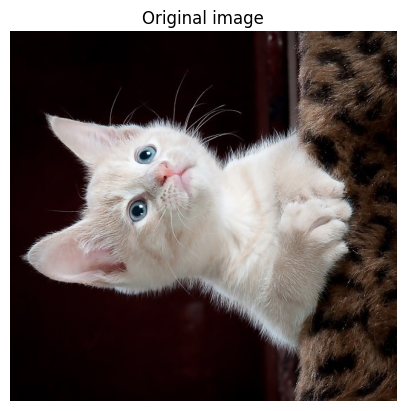

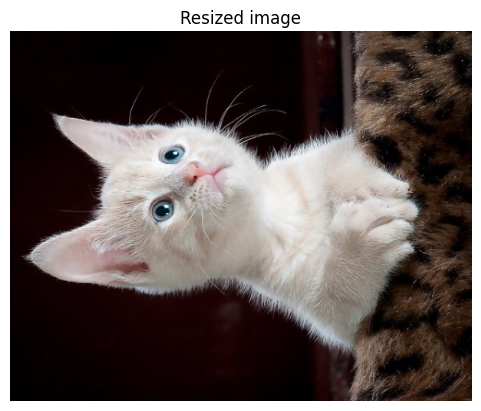

In [22]:
from skimage.transform import resize

# Height and width to resize
height = 400
width = 500

# Resize image
image_resized = resize(image_cat, (height, width), anti_aliasing=True)

# Show the original and resulting images
show_image(image_cat, 'Original image')
show_image(image_resized, 'Resized image')

#### Redimensionar proporcionalmente
Si queremos evitar dimensiones desproporcionadas, podemos redimensionar una imagen proporcionalmente. Para ello, tomamos el ancho original de la imagen y lo dividimos entre el factor de escala.

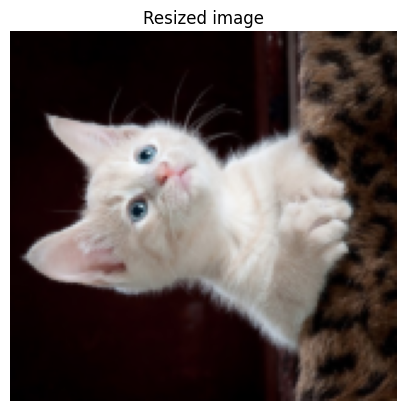

In [23]:
from skimage.transform import resize

# Set proportional height so its 4 times its size
height = image_cat.shape[0] / 4
width = image_cat.shape[1] / 4

# Resize image
image_resized = resize(image_cat, (height, width), anti_aliasing=True)

show_image(image_resized, 'Resized image')

## Aliasing, rotación y reescalado

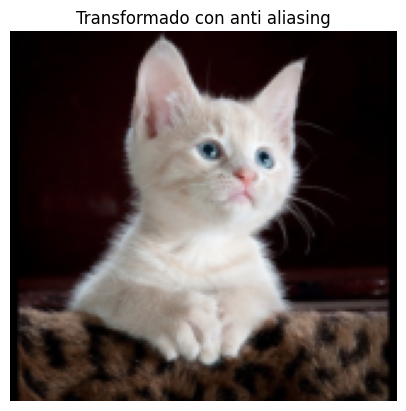

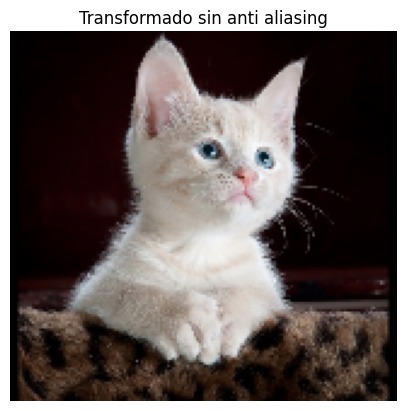

In [27]:
from skimage.transform import rotate, rescale

image_cat = plt.imread('dataset/image_cat.jpg')

# Rotamos 90 grados
rotated_cat_image = rotate(image_cat, -90)

# Reescalamos con anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, channel_axis=-1)

# Reescalamos sin anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, channel_axis=-1)

# Mostramos los resultados
show_image(rescaled_with_aa, 'Transformado con anti aliasing')

show_image(rescaled_without_aa, 'Transformado sin anti aliasing')

### 📝Ampliación de imágenes
¿Alguna vez has intentado redimensionar una imagen para agrandarla? Esto suele provocar pérdida de calidad y que la imagen ampliada se vea borrosa.

La buena noticia es que el algoritmo de scikit-image funciona muy bien para ampliar imágenes hasta cierto punto.

¡En este ejercicio se amplió una imagen tres veces!

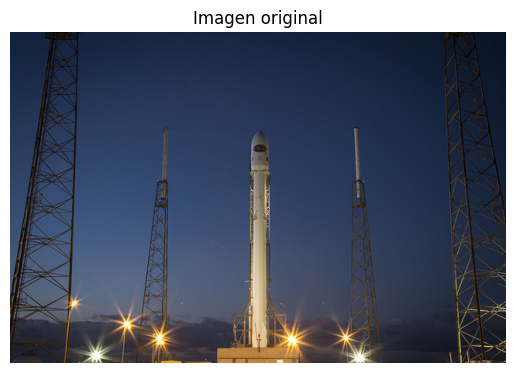

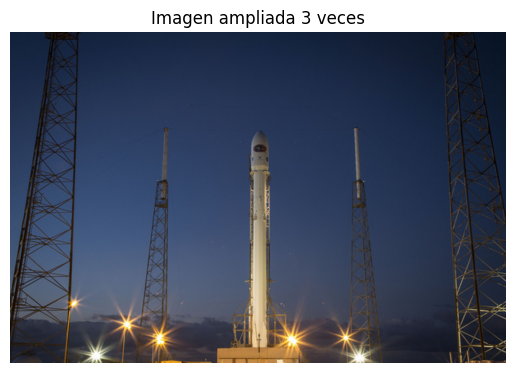

In [32]:
from skimage.transform import rescale

# Cargar la imagen desde data
rocket_image = data.rocket()

# Hacer mas grande la imagen 3 veces
enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, channel_axis=-1)

# Mostrar la imagen original
show_image(rocket_image,'Imagen original')

#
show_image(enlarged_rocket_image, 'Imagen ampliada 3 veces')

### 📝Redimensionamiento proporcional
Queremos reducir el tamaño de las imágenes de un blog veterinario para que todas tengan el mismo tamaño comprimido.

Es importante que se haga proporcionalmente para que no se distorsionen.

Primero, probarás con una imagen para saber qué código probar después en las demás.

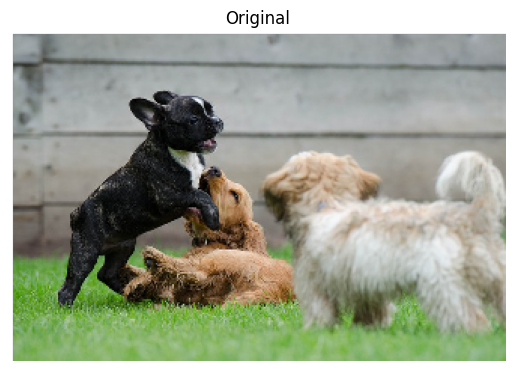

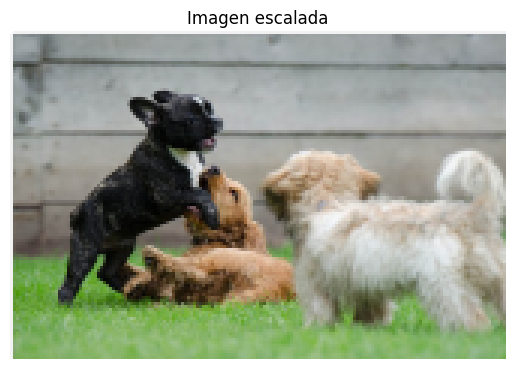

In [34]:
from skimage.transform import resize

dogs_banner = plt.imread('dataset/dogs_banner.png')

# Cambiamos de forma propcional la altura y anchura
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Escalamos usando el proporcional obtenido
image_resized = resize(dogs_banner, (height, width), anti_aliasing=True)

# Mostramos la imagen original
show_image(dogs_banner, "Original")

show_image(image_resized, 'Imagen escalada')

# 📙 Morfología
Las regiones binarias producidas por un umbral simple pueden verse distorsionadas por el ruido y la textura. Para eliminar este tipo de distorsión, podemos utilizar el filtrado morfológico.

Las operaciones de filtrado morfológico intentan eliminar estas imperfecciones teniendo en cuenta la forma y la estructura de los objetos de la imagen. Estas operaciones son especialmente adecuadas para imágenes binarias, pero algunas pueden extenderse a las de escala de grises.

### 📌 Operaciones morfológicas
Las operaciones morfológicas básicas son:
- Dilatación (Añade píxeles a los límites de los objetos de una imagen)
- Erosión (Elimina píxeles de los límites de los objetos)

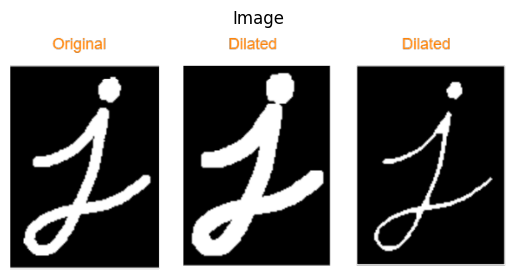

In [35]:
morpho = plt.imread('dataset/morphological_op.png')
show_image(morpho)

La cantidad de píxeles añadidos o eliminados de los objetos de una imagen depende del tamaño y la forma de un **elemento estructurante** utilizado para procesar la imagen.

**Elemento estructurante:** El elemento estructurante es una pequeña imagen binaria que se utiliza para analizar la imagen de entrada.

#### Formas en scikit-image
Scikit-image ofrece múltiples formas para este elemento estructurado, cada una con su propio método del módulo de morfología. Si queremos un cuadrado como elemento estructurado, podemos obtenerlo con el método cuadrado o un rectángulo con ancho y alto, esto devolverá la forma deseada y, al imprimir, veremos cómo se forman con 1s.

In [40]:
from skimage import morphology

square = morphology.square(4)
# [[1 1 1 1]
# [1 1 1 1]
# [1 1 1 1]
# [1 1 1 1]]

rectangle = morphology.rectangle(4, 2)
# [[1 1]
# [1 1]
# [1 1]
# [1 1]]
print(square)
print(rectangle)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[1 1]
 [1 1]
 [1 1]
 [1 1]]


<ipython-input-40-357927927>:3: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  square = morphology.square(4)
<ipython-input-40-357927927>:9: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  rectangle = morphology.rectangle(4, 2)


### 📌 Erosion en scikit-image


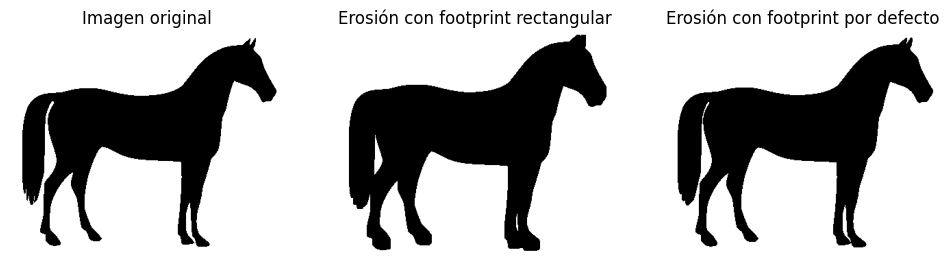

In [51]:
from skimage import data, morphology
import matplotlib.pyplot as plt

# Cargar imagen binaria del caballo
image_horse = data.horse()

# Crear elemento estructurante rectangular (footprint moderno)
selem = morphology.footprint_rectangle((12, 6))

# Erosión binaria con footprint definido
eroded_image = morphology.binary_erosion(image_horse, footprint=selem)

# Erosión binaria con footprint por defecto
eroded_default = morphology.binary_erosion(image_horse)

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image_horse, cmap='gray')
axes[0].set_title('Imagen original')
axes[1].imshow(eroded_image, cmap='gray')
axes[1].set_title('Erosión con footprint rectangular')
axes[2].imshow(eroded_default, cmap='gray')
axes[2].set_title('Erosión con footprint por defecto')

for ax in axes:
    ax.axis('off')

plt.show()


### 📌 Dilation in scikit-image

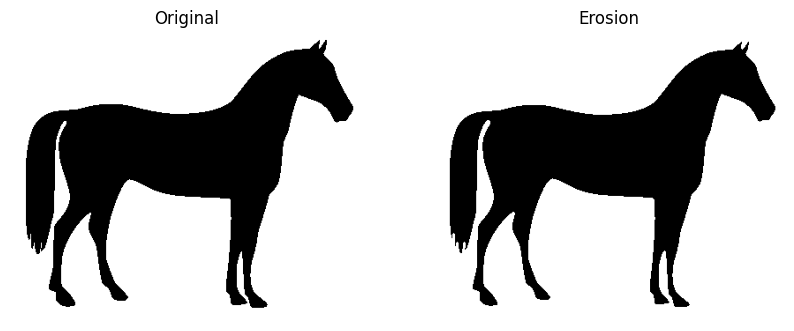

In [53]:
from skimage import morphology

# Obtener imagen dilatada, utilizando dilatación binaria
dilated_image = morphology.binary_dilation(image_horse)

# Ver resultados
plot_comparison(image_horse, dilated_image, 'Erosion')

### 📝Handwritten letters
A very interesting use of computer vision in real-life solutions is performing Optical Character Recognition (OCR) to distinguish printed or handwritten text characters inside digital images of physical documents.

Let's try to improve the definition of this handwritten letter so that it's easier to classify.

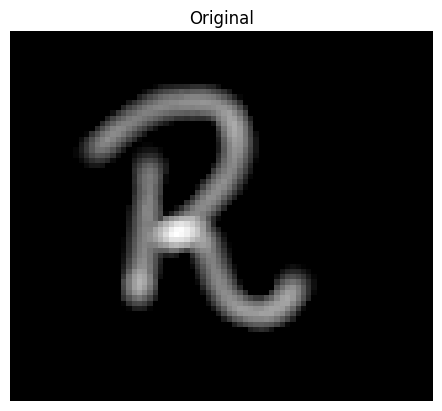

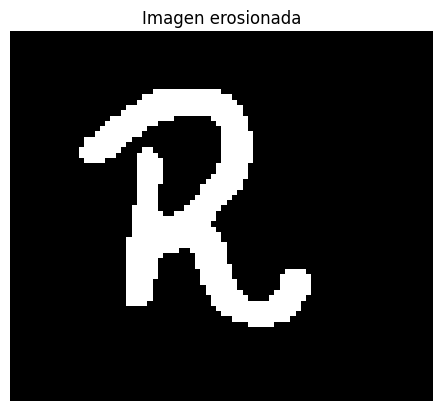

In [57]:
from skimage import morphology

upper_r_image = plt.imread('dataset/r5.png')
upper_r_image = color.rgb2gray(upper_r_image)

# Obtener la forma erosionada
eroded_image_shape = morphology.binary_erosion(upper_r_image)

# Ver resultados
show_image(upper_r_image, 'Original')

show_image(eroded_image_shape, 'Imagen erosionada')

### 📝Mejora de la imagen con umbral
En este ejercicio, intentaremos reducir el ruido de una imagen con umbral mediante la operación morfológica de dilatación.

Esta operación, en cierto modo, expande los objetos de la imagen.

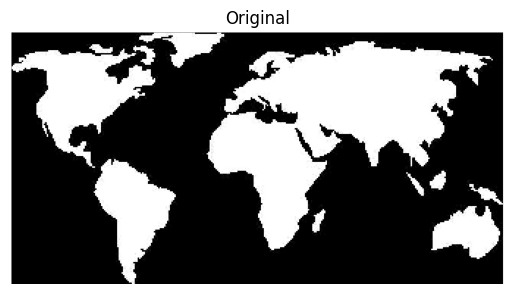

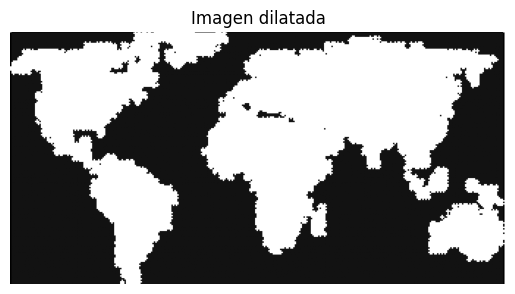

In [62]:
world_image = plt.imread('dataset/world_image.png')

# Obtener la imagen dilatada
dilated_image = morphology.binary_dilation(world_image)
dilated_image = color.rgb2gray(color.rgba2rgb(dilated_image))

# Ver los resultados
show_image(world_image, 'Original')
show_image(dilated_image, 'Imagen dilatada')